In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_directory = os.path.join('../', 'data')

%matplotlib inline
sns.set(style='white', font_scale=0.9)

In [3]:
cleaned_data_path = os.path.join('../', 'Cleaned_AcceptedLoanData.csv')
loan = pd.read_csv(cleaned_data_path, low_memory=False, encoding='latin-1')

In [4]:
loan.head(3)

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  Unknown        NaN     5000.0       5000.0           4975.0   
1           1  Unknown        NaN     2500.0       2500.0           2500.0   
2           2  Unknown        NaN     2400.0       2400.0           2400.0   

         term  int_rate  installment grade     ...     num_tl_op_past_12m  \
0   36 months     10.65       162.87     B     ...               2.109639   
1   60 months     15.27        59.83     C     ...               2.109639   
2   36 months     15.96        84.33     C     ...               2.109639   

  pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  tax_liens  \
0      94.067504         47.454673                  0.0        0.0   
1      94.067504         47.454673                  0.0        0.0   
2      94.067504         47.454673                  0.0        0.0   

  tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit  \
0   173672.715478       50299.26653   21487.896168               42211.776254   
1   173672.715478       50299.26653   21487.896168               42211.776254   
2   173672.715478       50299.26653   21487.896168               42211.776254   

    timestamp  
0  1491524150  
1  1491524150  
2  1491524150  

[3 rows x 91 columns]

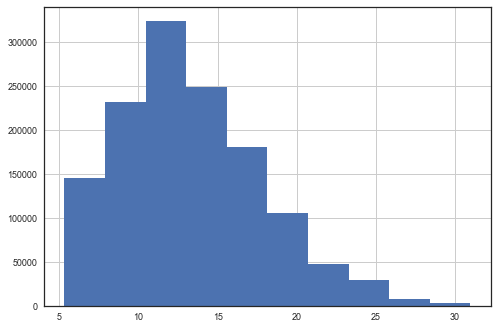

In [6]:
# see dictribution of loan
loan['int_rate'].hist()

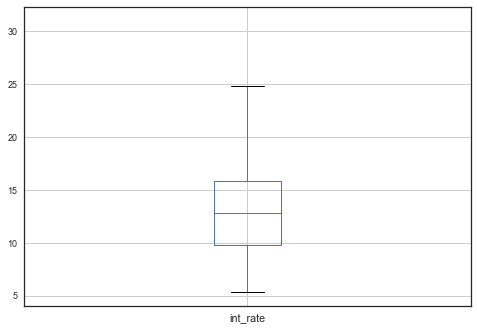

In [7]:
loan.boxplot(column='int_rate')

In [8]:
loan[["loan_amnt","annual_inc"]].dropna().describe()

loan_amnt    annual_inc
count  1.321864e+06  1.321864e+06
mean   1.474822e+04  7.649594e+04
std    8.622087e+03  6.911137e+04
min    5.000000e+02  0.000000e+00
25%    8.000000e+03  4.600000e+04
50%    1.290000e+04  6.500000e+04
75%    2.000000e+04  9.000000e+04
max    4.000000e+04  9.573072e+06

In [9]:
loan.isnull().sum()

Unnamed: 0                              0
id                                      0
member_id                         1321864
loan_amnt                               0
funded_amnt                             0
funded_amnt_inv                         0
term                                    0
int_rate                                0
installment                             0
grade                                   0
sub_grade                               0
emp_title                               0
emp_length                              0
home_ownership                          0
annual_inc                              0
verification_status                     0
issue_d                                 0
loan_status                             0
pymnt_plan                              0
purpose                                 0
title                                   0
zip_code                                0
addr_state                              0
dti                               

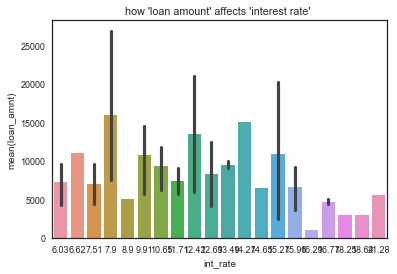

In [10]:
plt.rc("figure", figsize=(6, 4))
sns.barplot(y='loan_amnt',x="int_rate",data = loan[:50])
plt.title("how 'loan amount' affects 'interest rate' ")

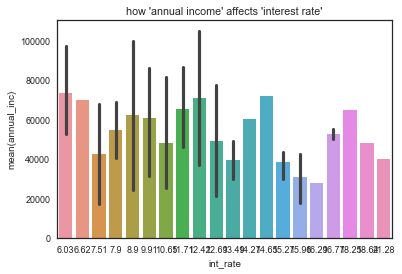

In [11]:
plt.rc("figure", figsize=(6, 4))
sns.barplot(y='annual_inc',x="int_rate",data = loan[:50])
plt.title("how 'annual income' affects 'interest rate'")

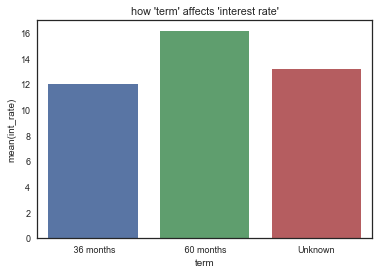

In [12]:
plt.rc("figure", figsize=(6, 4))
sns.barplot(x='term', y="int_rate", data = loan)
plt.title("how 'term' affects 'interest rate'")

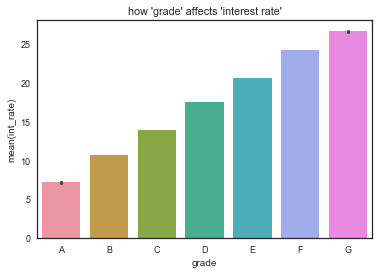

In [13]:
loan['grade'].unique()
plt.rc("figure", figsize=(6, 4))
sns.barplot(x='grade', y="int_rate", data = loan, order=["A","B","C","D","E","F","G"])
plt.title("how 'grade' affects 'interest rate'")

In [14]:
loan["issue_d"].unique()
loan["issue_d"] = loan["issue_d"].str.split("-")
loan["issue_month"] = loan["issue_d"].str[0]
loan["issue_year"] = loan["issue_d"].str[1]

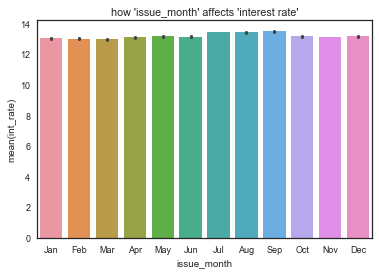

In [15]:
order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
sns.barplot(x='issue_month', y="int_rate", data = loan, order = order)
plt.title("how 'issue_month' affects 'interest rate'")

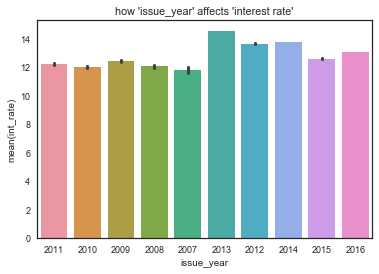

In [16]:
sns.barplot(x='issue_year', y="int_rate", data = loan)
plt.title("how 'issue_year' affects 'interest rate'")

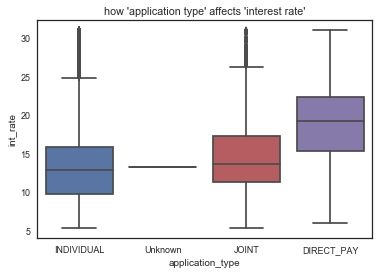

In [17]:
plt.rc("figure", figsize=(6, 4))
sns.boxplot(x='application_type',y="int_rate",data = loan)
plt.title("how 'application type' affects 'interest rate'")

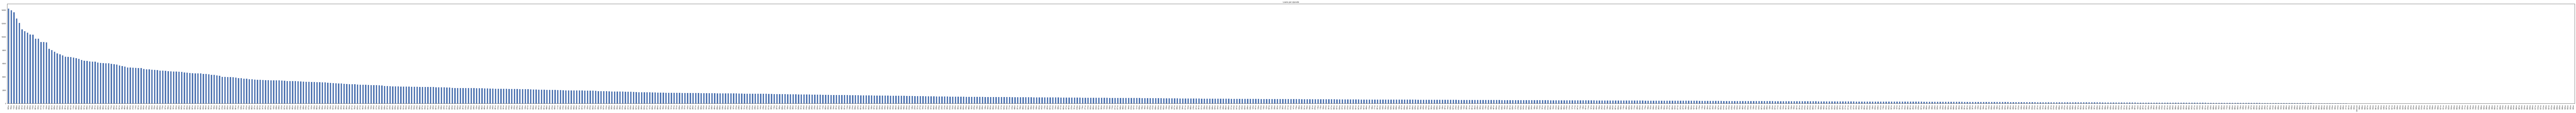

In [18]:
loan_location = loan.zip_code.value_counts()

loan_location.plot(kind = 'bar',figsize=(250,10), title = 'Loans per zipcode')

#  Looks like Cali.

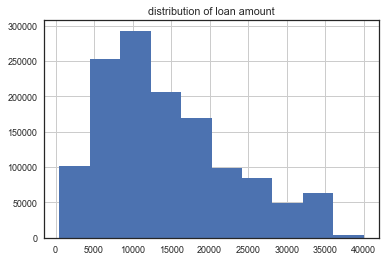

In [19]:
plt.rc("figure", figsize=(6, 4))
loan["loan_amnt"].hist()
plt.title("distribution of loan amount")

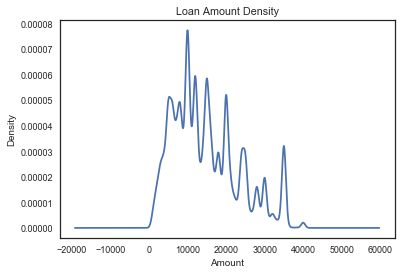

In [20]:
loan['loan_amnt'].plot.density()
plt.xlabel('Amount')
plt.title('Loan Amount Density')

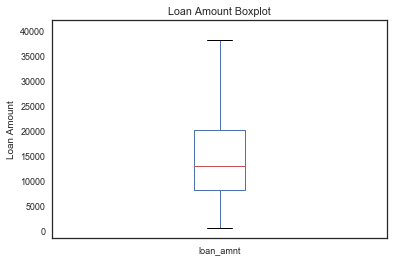

In [21]:
loan['loan_amnt'].plot.box()
plt.title('Loan Amount Boxplot')
plt.ylabel('Loan Amount')
plt.xlabel('')

In [22]:
loan['loan_status'].value_counts()

Current                                                732250
Fully Paid                                             441663
Charged Off                                            111740
Late (31-120 days)                                      18848
In Grace Period                                         10297
Late (16-30 days)                                        4274
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                    26
Unknown                                                    17
Name: loan_status, dtype: int64

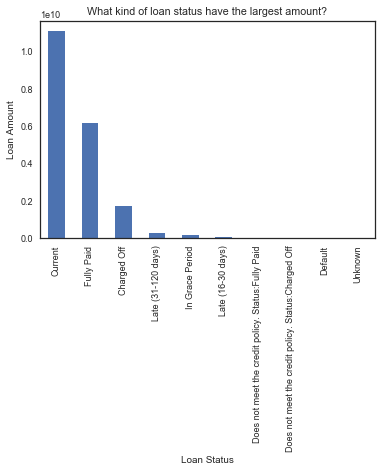

In [23]:
loan.groupby('loan_status')['loan_amnt'].sum().sort_values(ascending=0).plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('What kind of loan status have the largest amount?')

In [24]:
loan['purpose'].value_counts().head(n=10)

debt_consolidation    773152
credit_card           297803
home_improvement       83016
other                  71365
major_purchase         27683
small_business         15168
medical                13981
car                    13677
moving                  8644
vacation                7998
Name: purpose, dtype: int64

In [25]:
loan['title'].value_counts().head(n=10)

Debt consolidation         648570
Credit card refinancing    250516
Home improvement            69997
Other                       59637
Unknown                     23342
Major purchase              22082
Debt Consolidation          15763
Medical expenses            11882
Business                    11280
Car financing               10186
Name: title, dtype: int64

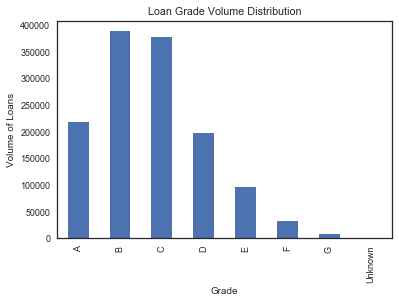

In [26]:
loan['grade'].value_counts().sort_index().plot(kind='bar')
plt.title('Loan Grade Volume Distribution')
plt.xlabel('Grade')
plt.ylabel('Volume of Loans')

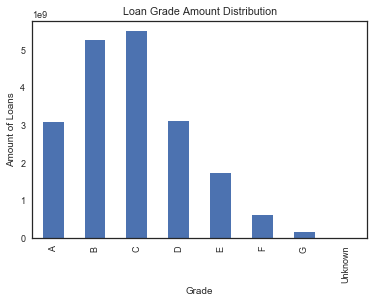

In [27]:
loan.groupby('grade')['loan_amnt'].sum().sort_index().plot(kind='bar')
plt.title('Loan Grade Amount Distribution')
plt.xlabel('Grade')
plt.ylabel('Amount of Loans')

Lets plot Annual Income against Funded Amount.

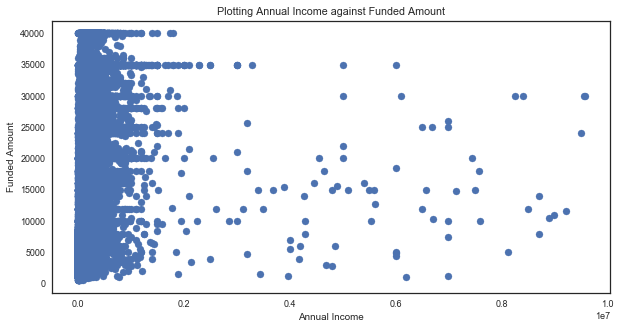

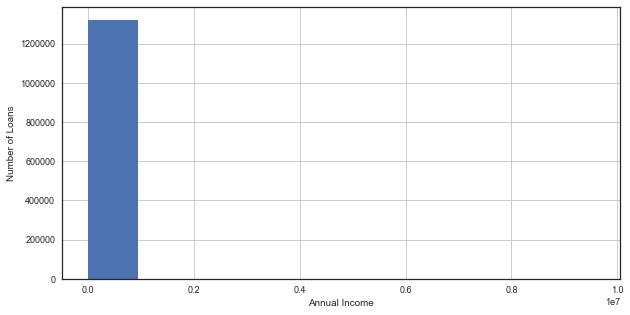

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(loan['annual_inc'], loan['funded_amnt'])
plt.title("Plotting Annual Income against Funded Amount")
plt.ylabel('Funded Amount')
plt.xlabel('Annual Income')
plt.show()

loan.annual_inc.hist(figsize=(10,5))
plt.ylabel('Number of Loans')
plt.xlabel('Annual Income')

There are several outliers to be accounted for. Lets limit the data to annual income of $200000.

In [29]:
loan = loan[loan['annual_inc']<200000]

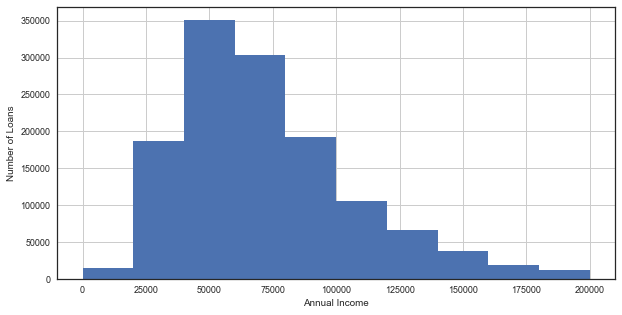

In [30]:
loan.annual_inc.hist(figsize=(10,5))
plt.ylabel('Number of Loans')
plt.xlabel('Annual Income')

Create a Default status for loan_status

In [31]:
def CreateDefault(Loan_Status):
    if Loan_Status in ['Current', 'Fully Paid', 'In Grace Period']:
        return 0
    else:
        return 1 
    
loan['Default'] = loan['loan_status'].apply(lambda x: CreateDefault(x))

**Loan Amount for default and no default**

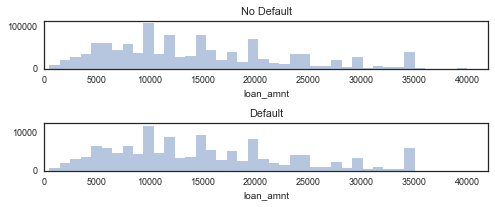

In [32]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 3))

sns.distplot(loan[loan['Default'] == 0]['loan_amnt'], bins=40, ax=ax1, kde=False)
sns.distplot(loan[loan['Default'] == 1]['loan_amnt'], bins=40, ax=ax2, kde=False)

ax1.set_title('No Default')
ax2.set_title('Default')

ax1.set_xbound(lower=0)
ax2.set_xbound(lower=0)

plt.tight_layout()
plt.show()

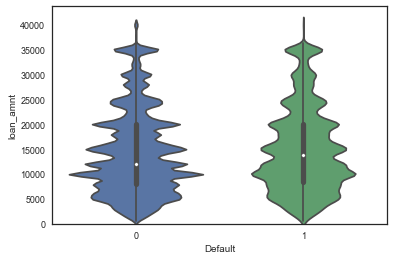

In [33]:
ax1 = sns.violinplot(x='Default', y='loan_amnt', data=loan)
ax1.set_ybound(lower=0)
plt.show()

Both No default and default have a resonably similar distribution of  the loan amount

**Loan Term with default and no default**

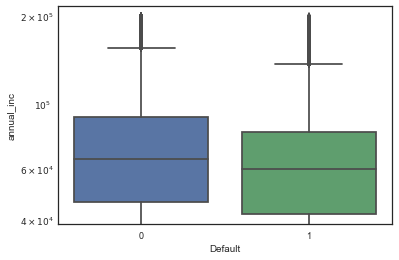

In [34]:
ax1 = sns.boxplot(x='Default', y='annual_inc', data=loan)
ax1.set_ybound(lower=0)
ax1.set_yscale('log')

plt.show()

Defaulting loans have a lower annual income than the non defaulting loans. 

**Debt to income ration for default and no default**

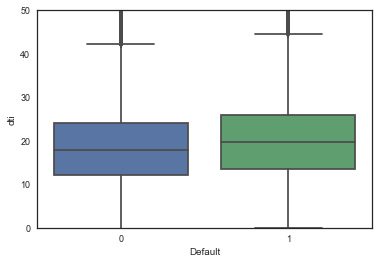

In [35]:
ax1 = sns.boxplot(x='Default', y='dti', data=loan)
ax1.set_ybound(lower=0, upper=50)
plt.show()

Defaulting loans have a higher DTI